In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
#para conseguir visualizar os gráficos no notebook
%matplotlib inline
import plotly.express as px



In [2]:
data=pd.read_csv('../data_ifes.csv')



In [3]:
regioes_brasileiras = {
    "AC": "Norte",
    "AL": "Nordeste",
    "AP": "Norte",
    "AM": "Norte",
    "BA": "Nordeste",
    "CE": "Nordeste",
    "DF": "Centro-Oeste",
    "ES": "Sudeste",
    "GO": "Centro-Oeste",
    "MA": "Nordeste",
    "MT": "Centro-Oeste",
    "MS": "Centro-Oeste",
    "MG": "Sudeste",
    "PA": "Norte",
    "PB": "Nordeste",
    "PR": "Sul",
    "PE": "Nordeste",
    "PI": "Nordeste",
    "RJ": "Sudeste",
    "RN": "Nordeste",
    "RO": "Norte",
    "RS": "Sul",
    "RR": "Norte",
    "SC": "Sul",
    "SE": "Nordeste",
    "SP": "Sudeste",
    "TO": "Centro-Oeste"
}


In [4]:
ipc_table=pd.read_excel('ipc_technology.xlsx')
ipc_table_tratado=ipc_table[['Sector_en','Field_pt','IPC_code']]
mapeamento_area_tecnologica=dict(zip(ipc_table_tratado['IPC_code'],ipc_table_tratado['Field_pt']))
mapeamento_area_tecnologica = {k.strip(): v.strip() for k, v in mapeamento_area_tecnologica.items()}

In [5]:
data_analise_ci=data[['titular_1','titular_parceiros1','titular_parceiros2','titular_abv','titular_uf1','classif_internacion']]
df_classificacao_internacional=data_analise_ci['classif_internacion'].str.split(";",expand=True)
df_classificacao_internacional.columns = ['class_int' + str(i) for i in range(1, df_classificacao_internacional.shape[1] + 1)]
data_analiseCI=pd.concat([data_analise_ci, df_classificacao_internacional], axis=1).drop(columns=['classif_internacion'])
data_analiseCI['Regiao'] = data_analiseCI['titular_uf1'].map(regioes_brasileiras)
cols = data_analiseCI.columns.tolist()
cols.insert(3, cols.pop(cols.index('Regiao')))
data_analiseCI = data_analiseCI[cols]
data_analise=data_analiseCI[['titular_1','titular_parceiros1','titular_parceiros2','titular_abv','titular_uf1','Regiao','class_int1']]

data_analise.head()

,titular_1,titular_parceiros1,titular_parceiros2,titular_abv,titular_uf1,Regiao,class_int1
0,UNIVERSIDADE FEDERAL DO CEARÁ,NaN,NaN,UFC,CE,Nordeste,H01Q 13/10
1,FUNDAÇÃO UNIVERSIDADE DO AMAZONAS,NaN,NaN,UFAM,AM,Norte,H04L 29/06
2,"INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNO...",UNIVERSIDADE FEDERAL DE PERNAMBUCO,ASSOCIAÇÃO INSTITUTO DE TECNOLOGIA DE PERNAMBU...,IFPE,PE,Nordeste,G01D 3/08
3,"INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNO...",NaN,NaN,IFGOIANO,GO,Centro-Oeste,A21D 13/045
4,UNIVERSIDADE FEDERAL DE UBERLÂNDIA,NaN,NaN,UFU,MG,Sudeste,C12Q 1/68


In [6]:
class_int=data_analise['class_int1'].str.split(' ',expand=True)
class_int.columns = ['IPC' + str(i) for i in range(1, class_int.shape[1] + 1)]
dados_ci=pd.concat([data_analise, class_int], axis=1)
dados_ci

,titular_1,titular_parceiros1,titular_parceiros2,titular_abv,titular_uf1,Regiao,class_int1,IPC1,IPC2
0,UNIVERSIDADE FEDERAL DO CEARÁ,NaN,NaN,UFC,CE,Nordeste,H01Q 13/10,H01Q,13/10
1,FUNDAÇÃO UNIVERSIDADE DO AMAZONAS,NaN,NaN,UFAM,AM,Norte,H04L 29/06,H04L,29/06
2,"INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNO...",UNIVERSIDADE FEDERAL DE PERNAMBUCO,ASSOCIAÇÃO INSTITUTO DE TECNOLOGIA DE PERNAMBU...,IFPE,PE,Nordeste,G01D 3/08,G01D,3/08
3,"INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNO...",NaN,NaN,IFGOIANO,GO,Centro-Oeste,A21D 13/045,A21D,13/045
4,UNIVERSIDADE FEDERAL DE UBERLÂNDIA,NaN,NaN,UFU,MG,Sudeste,C12Q 1/68,C12Q,1/68
...,...,...,...,...,...,...,...,...,...
3786,INSTITUTO FEDERAL DE EDUCAÇÃO CIÊNCIA E TECNOL...,NaN,NaN,IFMA,MA,Nordeste,B29C 45/18,B29C,45/18
3787,UNIVERSIDADE FEDERAL DO MARANHÃO,NaN,NaN,UFMA,MA,Nordeste,A61K 31/403,A61K,31/403
3788,UNIVERSIDADE FEDERAL DE CAMPINA GRANDE - PB,NaN,NaN,UFCG,PB,Nordeste,C01B 25/32,C01B,25/32
3789,UNIVERSIDADE FEDERAL DO SUL E SUDESTE DO PARÁ,NaN,NaN,UNIFESSPA,PA,Norte,G01T 1/02,G01T,1/02


In [7]:
dados_tratado=dados_ci.copy()
dados_tratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3791 entries, 0 to 3790
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   titular_1           3791 non-null   object
 1   titular_parceiros1  1139 non-null   object
 2   titular_parceiros2  286 non-null    object
 3   titular_abv         3513 non-null   object
 4   titular_uf1         3782 non-null   object
 5   Regiao              3782 non-null   object
 6   class_int1          3728 non-null   object
 7   IPC1                3728 non-null   object
 8   IPC2                3728 non-null   object
dtypes: object(9)
memory usage: 266.7+ KB


In [8]:
dados_tratado.loc[dados_tratado['class_int1'].str.contains('^A61K 8', na=False), 'IPC1'] = 'A61K/8'
dados_tratado.loc[dados_tratado['class_int1'].str.contains('^H04N 1/', na=False), 'IPC1'] = 'H04N/1'
dados_tratado.loc[dados_tratado['class_int1'].str.contains('^G01N 33/', na=False), 'IPC1'] = 'G01N/33'
dados_tratado.loc[dados_tratado['class_int1'].str.contains('^B01D 50', na=False), 'IPC1'] = '^B01D/50'
dados_tratado.loc[dados_tratado['class_int1'].str.contains('^B01D 51', na=False), 'IPC1'] = '^B01D/51'
dados_tratado.loc[dados_tratado['class_int1'].str.contains('^B01D 52', na=False), 'IPC1'] = '^B01D/52'
dados_tratado.loc[dados_tratado['class_int1'].str.contains('^B01D 53', na=False), 'IPC1'] = '^B01D/53'

In [9]:
dados_tratado.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3791 entries, 0 to 3790
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   titular_1           3791 non-null   object
 1   titular_parceiros1  1139 non-null   object
 2   titular_parceiros2  286 non-null    object
 3   titular_abv         3513 non-null   object
 4   titular_uf1         3782 non-null   object
 5   Regiao              3782 non-null   object
 6   class_int1          3728 non-null   object
 7   IPC1                3728 non-null   object
 8   IPC2                3728 non-null   object
dtypes: object(9)
memory usage: 266.7+ KB


In [10]:
dados_tratado['Area']=dados_tratado['IPC1'].map(mapeamento_area_tecnologica)
dados_tratado

,titular_1,titular_parceiros1,titular_parceiros2,titular_abv,titular_uf1,Regiao,class_int1,IPC1,IPC2,Area
0,UNIVERSIDADE FEDERAL DO CEARÁ,NaN,NaN,UFC,CE,Nordeste,H01Q 13/10,H01Q,13/10,Telecomunicações
1,FUNDAÇÃO UNIVERSIDADE DO AMAZONAS,NaN,NaN,UFAM,AM,Norte,H04L 29/06,H04L,29/06,Comunicação digital
2,"INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNO...",UNIVERSIDADE FEDERAL DE PERNAMBUCO,ASSOCIAÇÃO INSTITUTO DE TECNOLOGIA DE PERNAMBU...,IFPE,PE,Nordeste,G01D 3/08,G01D,3/08,Medição
3,"INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNO...",NaN,NaN,IFGOIANO,GO,Centro-Oeste,A21D 13/045,A21D,13/045,Química Alimentar
4,UNIVERSIDADE FEDERAL DE UBERLÂNDIA,NaN,NaN,UFU,MG,Sudeste,C12Q 1/68,C12Q,1/68,Biotecnologia
...,...,...,...,...,...,...,...,...,...,...
3786,INSTITUTO FEDERAL DE EDUCAÇÃO CIÊNCIA E TECNOL...,NaN,NaN,IFMA,MA,Nordeste,B29C 45/18,B29C,45/18,Outras máquinas especiais
3787,UNIVERSIDADE FEDERAL DO MARANHÃO,NaN,NaN,UFMA,MA,Nordeste,A61K 31/403,A61K,31/403,Produtos farmacêuticos
3788,UNIVERSIDADE FEDERAL DE CAMPINA GRANDE - PB,NaN,NaN,UFCG,PB,Nordeste,C01B 25/32,C01B,25/32,"Materiais, metalurgia"
3789,UNIVERSIDADE FEDERAL DO SUL E SUDESTE DO PARÁ,NaN,NaN,UNIFESSPA,PA,Norte,G01T 1/02,G01T,1/02,Tecnologia Ambiental


In [11]:
#filtro_palavras = ['FEDERAL', 'FEDEERAL', 'UNIFEI', 'Federal', 'UNIVERSIDADE DE BRASILIA', 'UNIVERSIDADE DE BRASÍLIA', 'FUNDAÇÃO UNIVERSIDADE DO AMAZONAS', 'UNIVERSIDADE DA INTEGRAÇÃO INTERNACIONAL']
#ifes_titulares=dados_ci[dados_ci['titular_1'].str.contains('|'.join(filtro_palavras), case=False)]
#ifes_titulares['titular_1'].unique()

## Avaliação das Área Tecnologicas: Brasil

### 1. Todas as Instituições Federais de Ensino

In [12]:
grouped=dados_tratado.groupby('Area').agg(contagem=('Area','count')).sort_values(by='contagem',ascending=False)
grouped.head(5)


,contagem
Area,
Produtos farmacêuticos,504
Química Alimentar,462
Biotecnologia,371
Tecnologia médica,270
Química de materiais básicos,250


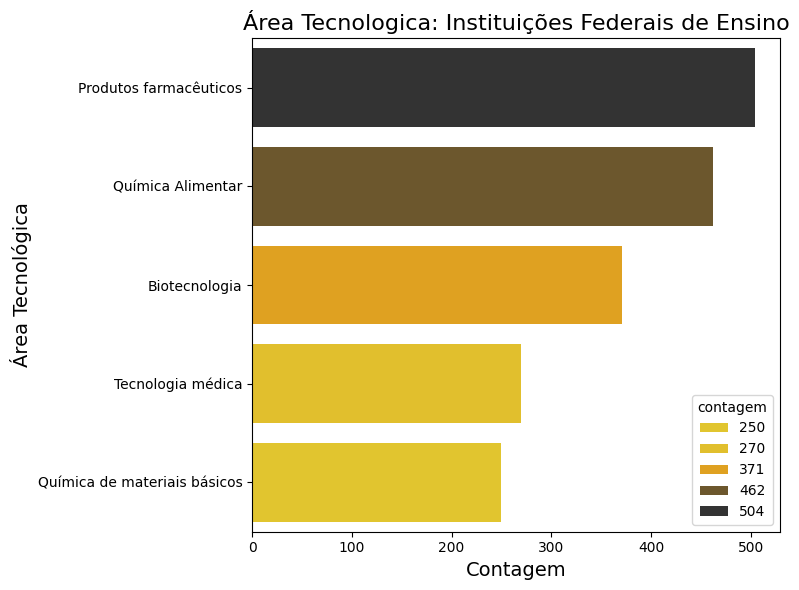

In [24]:
plt.figure(figsize=(8, 6)) 
sns.barplot(x="contagem", y="Area", 
            hue="contagem", data=grouped.head(5), 
            palette="Wistia_d") 
  
plt.ylabel("Área Tecnológica", size=14) 
plt.xlabel("Contagem", size=14) 
plt.title("Área Tecnologica: Instituições Federais de Ensino", size=16)
plt.subplots_adjust(top=0.9,right = 0.9)
plt.tight_layout()
plt.savefig('streamlit/img/imagem_area_tecnologica.png')
plt.show()


### 2.Área Tecnológica por Institutos Federais

In [15]:
def aggregate_and_sort(df, group_column, agg_column):
    grouped = df.groupby(group_column).agg(contagem=(agg_column, 'count')).sort_values(by='contagem', ascending=False)
    return grouped

In [16]:
data_analise_IF=dados_tratado[dados_tratado['titular_1'].str.contains('^INSTITUTO|^CENTRO FEDERAL')|dados_tratado['titular_parceiros1'].str.contains('^INSTITUTO|^CENTRO FEDERAL')|dados_tratado['titular_parceiros2'].str.contains('^INSTITUTO|^CENTRO FEDERAL') ]
data_analise_IF['titular_1'].unique()

array(['INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DE PERNAMBUCO',
       'INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA GOIANO',
       'INSTITUTO DE TECNOLOGIA E PESQUISA',
       'INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DO SUL DE MINAS GERAIS - IFSULDEMINAS',
       'INSTITUTO FEDERAL DE EDUCAÇÃO CIÊNCIA E TECNOLOGIA DO ESPIRITO SANTO',
       'INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DE RONDÔNIA',
       'INSTITUTO FEDERAL DE SANTA CATARINA',
       'INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DO PIAUÍ',
       'FUNDAÇÃO UNIVERSIDADE DE PASSO FUNDO',
       'INSTITUTO FEDERAL DO PARANÁ',
       'INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DO RIO GRANDE DO NORTE',
       'CENTRO FEDERAL DE EDUCAÇÃO TECNOLÓGICA DE MINAS GERAIS',
       'INSTITUTO FEDERAL SUL-RIO-GRANDENSE',
       'INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DO SERTÃO PERNAMBUCANO',
       'INSTITUTO FEDERAL DE EDUCAÇÃO CIÊNCIA E TECNOLOGIA DO AMAZONAS',
 

In [17]:
area_tecnologica_if=aggregate_and_sort(data_analise_IF,'Area','Area')
area_tecnologica_if.head(5)

,contagem
Area,
Química Alimentar,67
Outras máquinas especiais,43
Tecnologia médica,37
Química de materiais básicos,34
"Materiais, metalurgia",32


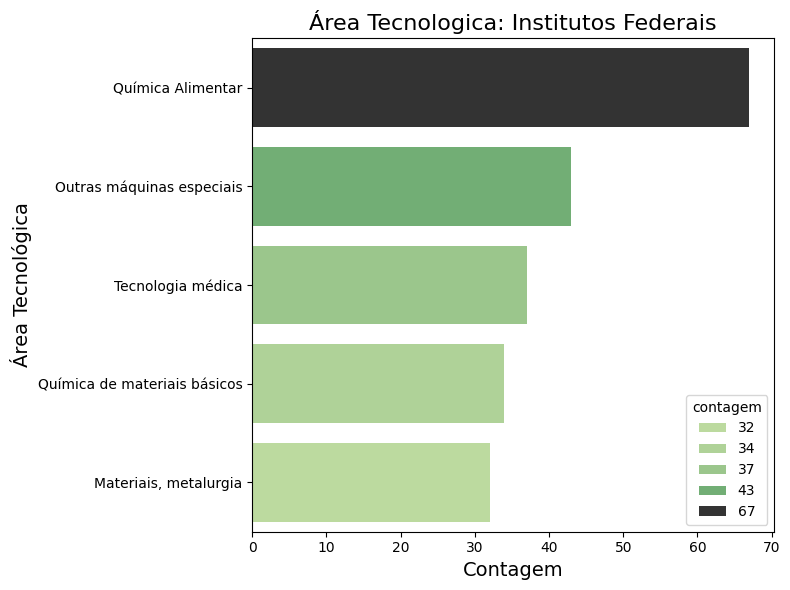

In [18]:
plt.figure(figsize=(8, 6)) 
sns.barplot(x="contagem", y="Area", 
            hue="contagem", data=area_tecnologica_if.head(5), 
            palette="YlGn_d") 
  
plt.ylabel("Área Tecnológica", size=14) 
plt.xlabel("Contagem", size=14) 
plt.title("Área Tecnologica: Institutos Federais", size=16)
plt.subplots_adjust(top=0.9,right = 0.9)
plt.tight_layout()
plt.savefig('streamlit/img/imagem_area_tecnologica_if.png')
plt.show()

### 3. Área Tecnológica: Universidades Federais






In [19]:
data_analise_UV=dados_tratado[dados_tratado['titular_1'].str.contains('UNIVER')|dados_tratado['titular_parceiros1'].str.contains('^UNIVER')|dados_tratado['titular_parceiros2'].str.contains('^UNIVER') ]
data_analise_UV['titular_1'].unique()

array(['UNIVERSIDADE FEDERAL DO CEARÁ',
       'FUNDAÇÃO UNIVERSIDADE DO AMAZONAS',
       'INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DE PERNAMBUCO',
       'UNIVERSIDADE FEDERAL DE UBERLÂNDIA',
       'UNIVERSIDADE FEDERAL DO MARANHÃO',
       'UNIVERSIDADE TECNOLOGICA FEDERAL DO PARANA',
       'PETRÓLEO BRASILEIRO S.A. - PETROBRAS',
       'UNIVERSIDADE FEDERAL DE CAMPINA GRANDE - PB',
       'UNIVERSIDADE FEDERAL DE MINAS GERAIS',
       'UNIVERSIDADE FEDERAL DA PARAIBA',
       'UNIVERSIDADE FEDERAL DE PERNAMBUCO',
       'UNIVERSIDADE FEDERAL DO PARÁ',
       'INSTITUTO DE TECNOLOGIA E PESQUISA',
       'UNIVERSIDADE FEDERAL DE JUIZ DE FORA - UFJF',
       'FUNDAÇÃO UNIVERSIDADE FEDERAL DO PAMPA',
       'UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE',
       'UNIVERSIDADE FEDERAL DO RIO GRANDE DO SUL',
       'UNIVERSIDADE FEDERAL DE SERGIPE',
       'UNIVERSIDADE FEDERAL DE SANTA MARIA',
       'UNIVERSIDADE FEDERAL DA BAHIA',
       'UNIVERSIDADE ESTADUAL DO OESTE DO P

In [20]:
area_tecnologica_uv=aggregate_and_sort(data_analise_UV,'Area','Area')
area_tecnologica_uv.head(5)

,contagem
Area,
Produtos farmacêuticos,493
Química Alimentar,413
Biotecnologia,356
Tecnologia médica,244
Química de materiais básicos,227


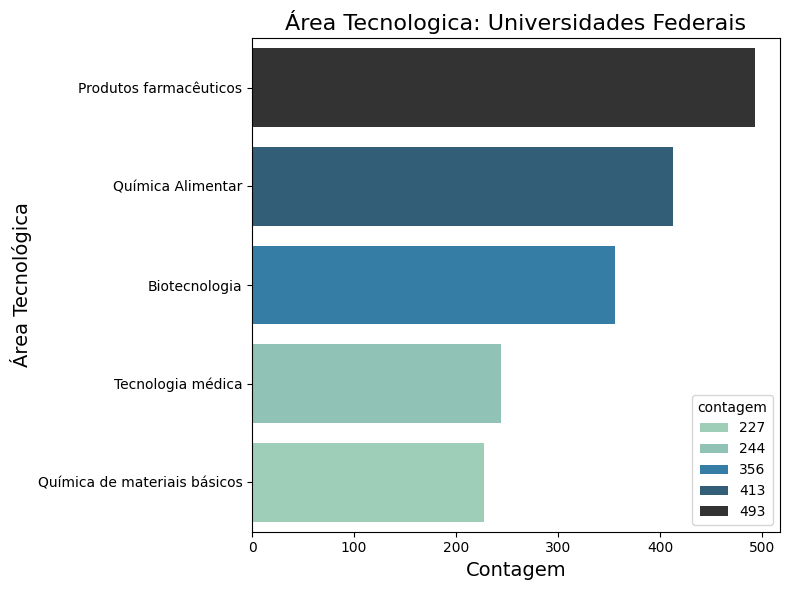

In [21]:
plt.figure(figsize=(8, 6)) 
sns.barplot(x="contagem", y="Area", 
            hue="contagem", data=area_tecnologica_uv.head(5), 
            palette='YlGnBu_d') 
  
plt.ylabel("Área Tecnológica", size=14) 
plt.xlabel("Contagem", size=14) 
plt.title("Área Tecnologica: Universidades Federais", size=16)
plt.subplots_adjust(top=0.9,right = 0.9)
plt.tight_layout()
plt.savefig('streamlit/img/imagem_area_tecnologica_univer.png')
plt.show()

## Avaliação das áreas tecnológicas por região

In [22]:
grouped_regiao = dados_tratado.groupby(['Regiao', 'titular_uf1', 'Area']).agg(contagem=('Area', 'count'))

total_por_estado = grouped_regiao.groupby('titular_uf1')['contagem'].transform('sum')


grouped_regiao['porcentagem'] = (grouped_regiao['contagem'] / total_por_estado) * 100


grouped_regiao

contagem  \
Regiao       titular_uf1 Area                                        
Centro-Oeste DF          Análise de materiais biológicos         2   
                         Biotecnologia                          23   
                         Controle                                1   
                         Engenharia Civil                        2   
                         Materiais, metalurgia                   1   
...                                                            ...   
Sul          SC          Química fina orgânica                   3   
                         Tecnologia Ambiental                    4   
                         Tecnologia computacional                4   
                         Tecnologia médica                      18   
                         Transporte                              2   

                                                          porcentagem  
Regiao       titular_uf1 Area                                          
Centro-Oeste DF          Análise de materiais biológicos     2.941176  
                         Biotecnologia                      33.823529  
                         Controle                            1.470588  
                         Engenharia Civil                    2.941176  
                         Materiais, metalurgia               1.470588  
...                                                               ...  
Sul          SC          Química fina orgânica               2.479339  
                         Tecnologia Ambiental                3.305785  
                         Tecnologia computacional            3.305785  
                         Tecnologia médica                  14.876033  
                         Transporte                          1.652893  

[514 rows x 2 columns]

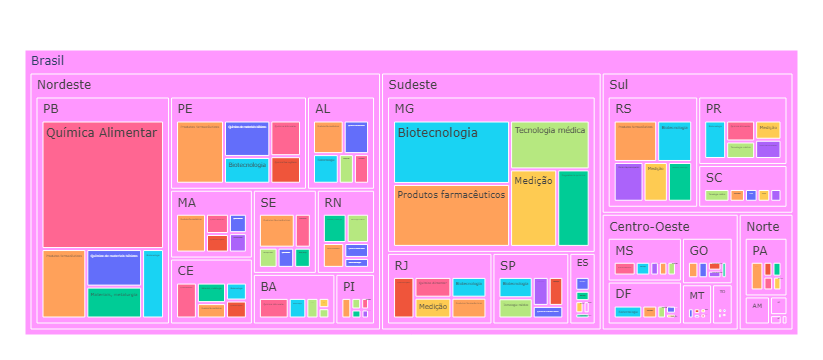

In [25]:
import plotly.express as px

grouped_regiao_sorted = grouped_regiao.sort_values(by=['titular_uf1', 'contagem'], ascending=[True, False])


top_5_per_state = grouped_regiao_sorted.groupby('titular_uf1').head(5).reset_index()


fig = px.treemap(top_5_per_state, 
                 path=[px.Constant("Brasil"),'Regiao', 'titular_uf1', 'Area'], 
                 values='contagem', 
                 color='Area',
                 color_continuous_scale='RdBu')

fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.write_image('streamlit/img/imagem_area_tecnologica_regiao.png')

fig.show()


### 1. Institutos Federais

In [31]:
grouped_regiao_IF = data_analise_IF.groupby(['Regiao', 'titular_uf1', 'Area']).agg(contagem=('Area', 'count'))

total_por_estado = grouped_regiao_IF.groupby('titular_uf1')['contagem'].transform('sum')


grouped_regiao_IF['porcentagem'] = (grouped_regiao_IF['contagem'] / total_por_estado) * 100


grouped_regiao_IF

contagem  porcentagem
Regiao       titular_uf1 Area                                               
Centro-Oeste DF          Biotecnologia                        1    50.000000
                         Medição                              1    50.000000
             GO          Controle                             1     4.000000
                         Engenharia química                   3    12.000000
                         Materiais, metalurgia                1     4.000000
...                                                         ...          ...
Sul          SC          Química de materiais básicos         4     9.302326
                         Química fina orgânica                2     4.651163
                         Tecnologia Ambiental                 1     2.325581
                         Tecnologia computacional             3     6.976744
                         Tecnologia médica                    3     6.976744

[242 rows x 2 columns]

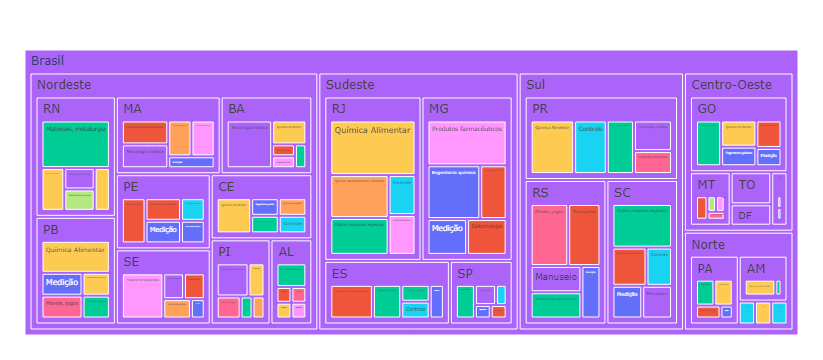

In [28]:
import plotly.express as px

grouped_regiao_sorted = grouped_regiao_IF.sort_values(by=['titular_uf1', 'contagem'], ascending=[True, False])


top_5_per_state = grouped_regiao_sorted.groupby('titular_uf1').head(5).reset_index()


fig = px.treemap(top_5_per_state, 
                 path=[px.Constant("Brasil"),'Regiao', 'titular_uf1', 'Area'], 
                 values='contagem', 
                 color='Area',
                 color_continuous_scale='RdBu')

fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.write_image('streamlit/img/imagem_area_tecnologica_regiaoIF.png')

fig.show()


### 2. Universidades

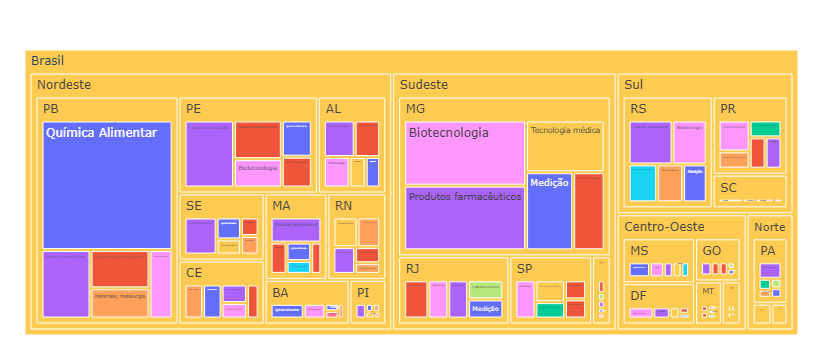

In [29]:
grouped_regiao_UV = data_analise_UV.groupby(['Regiao', 'titular_uf1', 'Area']).agg(contagem=('Area', 'count'))
grouped_regiao_sorted = grouped_regiao_UV.sort_values(by=['titular_uf1', 'contagem'], ascending=[True, False])


top_5_per_state = grouped_regiao_sorted.groupby('titular_uf1').head(5).reset_index()


fig = px.treemap(top_5_per_state, 
                 path=[px.Constant("Brasil"),'Regiao', 'titular_uf1', 'Area'], 
                 values='contagem', 
                 color='Area',
                 color_continuous_scale='RdBu')

fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.write_image('streamlit/img/imagem_area_tecnologica_regiaoUV.png')

fig.show()


## Áreas Tecnológicas - 5 Instituições que mais depositaram patentes

### 1. Universidades